#Imorting Libraries


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [ ]:
pip install pyforest

  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.2-py2.py3-none-any.whl size=15900 sha256=e28613002626485b459fda7f0be24f14444e3c24ab77beecc5cfd0a37da08ad3
  Stored in directory: /root/.cache/pip/wheels/c5/ca/73/5cdc3d087111bfbdef90be5457aa03c00c0e32241b2752445c
Successfully built pyforest


In [ ]:
from pyforest import*
lazy_imports()

['import dash',
 'from sklearn.linear_model import ElasticNetCV',
 'import bokeh',
 'from sklearn.ensemble import RandomForestRegressor',
 'import imutils',
 'from pathlib import Path',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import plotly.express as px',
 'import spacy',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'from sklearn.preprocessing import MinMaxScaler',
 'import textblob',
 'import plotly as py',
 'from sklearn.model_selection import StratifiedKFold',
 'from sklearn.preprocessing import RobustScaler',
 'from fbprophet import Prophet',
 'from sklearn.linear_model import Lasso',
 'import pickle',
 'from dask import dataframe as dd',
 'from scipy import stats',
 'from sklearn.linear_model import LinearRegression',
 'import matplotlib as mpl',
 'import pydot',
 'from sklearn.preprocessing import PolynomialFeatures',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'from sklearn.linear_model import LassoCV',
 'import xgboost a

In [ ]:
# importing csv file from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/ACCIDENT1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/ACCIDENT2.csv')
df3 = pd.read_csv('/content/drive/MyDrive/ACCIDENT3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Display the first few rows of each dataframe to understand their structure
print("ACCIDENT1.csv")
print(df1.head())

print("\nACCIDENT2.csv")
print(df2.head())

print("\nACCIDENT3.csv")
print(df3.head())

ACCIDENT1.csv
  VEHICLE TYPE  24-Apr  24-Mar  24-Feb  24-Jan  23-Dec  23-Nov  23-Oct  \
0     CAR/ZEEP       9       7      26      10      11       1       3   
1  BUS/MINIBUS      30      18      35      20      12      20      11   
2        TRUCK      29      51      45      20      35      47       4   
3      PICK-UP      12      11      15       6      14      10       4   
4    MICRO BUS      12       7      10       5       4       7       3   

   23-Sep  23-Aug  23-Jul  23-May  23-Apr  23-Mar  23-Feb  
0       7       7       4       5       3       1       6  
1      28      37      21      28      13      21      16  
2      22      19      28      20       4      18      22  
3      13       5       9       5       3       9       7  
4       5       3       6       3       0       5       2  

ACCIDENT2.csv
  VEHICLE TYPE  24-Apr  24-Mar  24-Feb  24-Jan  23-Dec  23-Nov  23-Oct  \
0     CAR/ZEEP       4       2       3       6       1       0       5   
1  BUS/MINIBUS    

DATASET-1 represents number of accidents per month for each type vehicle;
DATASET-2 represents number of person killed per month for each type vehicle;
DATASET-3 represents total number of person injured, killed, and accidents per month

#Analysis for dataset 1&2

##Data Visualization

First few rows of df1:
  VEHICLE TYPE  24-Apr  24-Mar  24-Feb  24-Jan  23-Dec  23-Nov  23-Oct  \
0     CAR/ZEEP       9       7      26      10      11       1       3   
1  BUS/MINIBUS      30      18      35      20      12      20      11   
2        TRUCK      29      51      45      20      35      47       4   
3      PICK-UP      12      11      15       6      14      10       4   
4    MICRO BUS      12       7      10       5       4       7       3   

   23-Sep  23-Aug  23-Jul  23-May  23-Apr  23-Mar  23-Feb  
0       7       7       4       5       3       1       6  
1      28      37      21      28      13      21      16  
2      22      19      28      20       4      18      22  
3      13       5       9       5       3       9       7  
4       5       3       6       3       0       5       2  

First few rows of df2:
  VEHICLE TYPE  24-Apr  24-Mar  24-Feb  24-Jan  23-Dec  23-Nov  23-Oct  \
0     CAR/ZEEP       4       2       3       6       1       0       5   


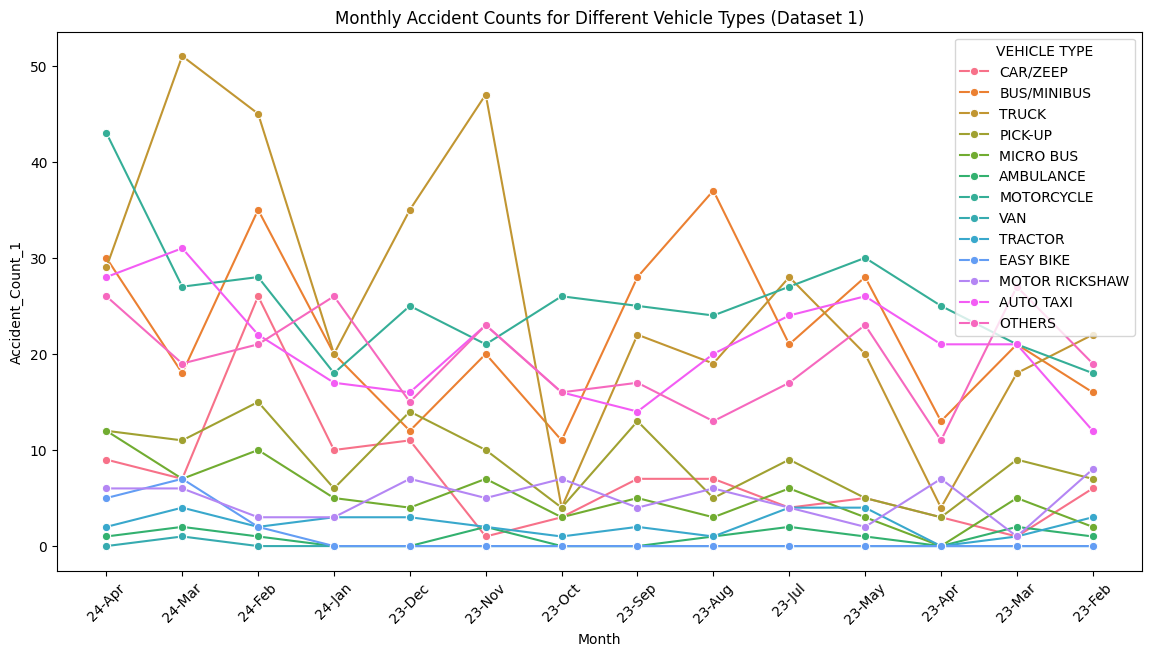

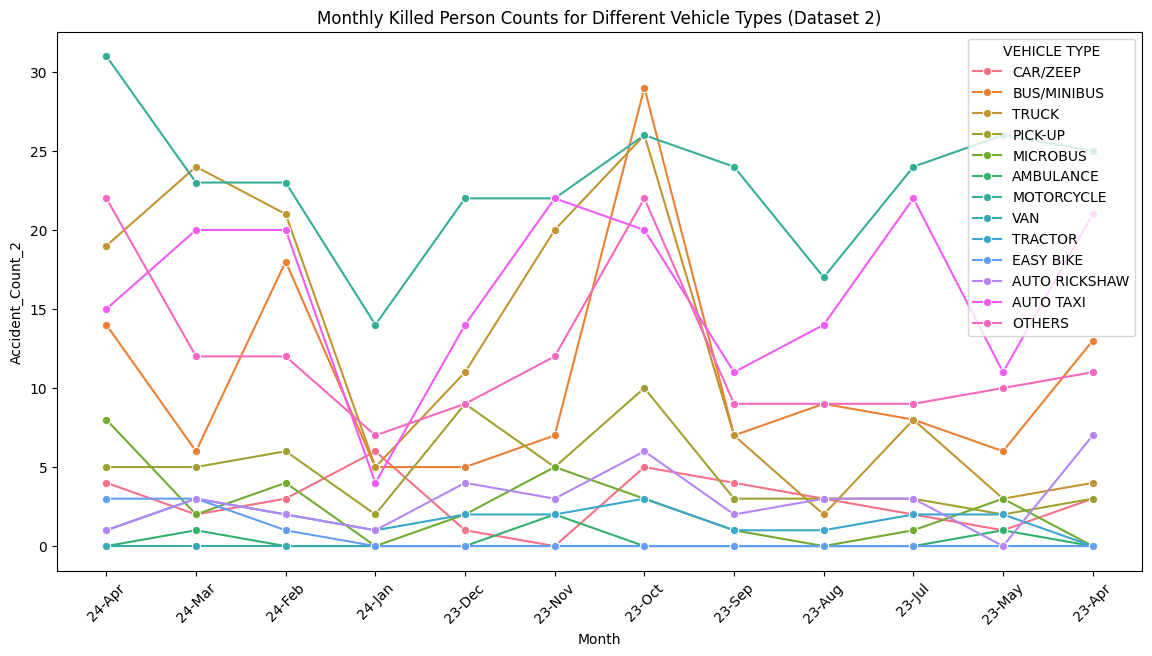

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the datasets are loaded as df1 and df2

# Step 1: Check the first few rows
print("First few rows of df1:")
print(df1.head())

print("\nFirst few rows of df2:")
print(df2.head())

# Step 2: Check for any missing values
print("\nMissing Values in df1:")
print(df1.isnull().sum())

print("\nMissing Values in df2:")
print(df2.isnull().sum())

# Step 3: Summary statistics
print("\nSummary Statistics for df1:")
print(df1.describe())

print("\nSummary Statistics for df2:")
print(df2.describe())

# Step 4: Visualize the distribution of accidents over time for each dataframe
# Convert 'Month' columns to datetime format (Month-Year)
df1_long = pd.melt(df1, id_vars=['VEHICLE TYPE'], var_name='Month', value_name='Accident_Count_1')
df2_long = pd.melt(df2, id_vars=['VEHICLE TYPE'], var_name='Month', value_name='Accident_Count_2')

# Plot for df1
plt.figure(figsize=(14, 7))
sns.lineplot(data=df1_long, x='Month', y='Accident_Count_1', hue='VEHICLE TYPE', marker='o')
plt.title('Monthly Accident Counts for Different Vehicle Types (Dataset 1)')
plt.xticks(rotation=45)
plt.show()

# Plot for df2
plt.figure(figsize=(14, 7))
sns.lineplot(data=df2_long, x='Month', y='Accident_Count_2', hue='VEHICLE TYPE', marker='o')
plt.title('Monthly Killed Person Counts for Different Vehicle Types (Dataset 2)')
plt.xticks(rotation=45)
plt.show()


## Statistics

In [ ]:
import pandas as pd
# Perform summary statistics on df1
summary_statistics_df1 = df1.describe()

summary_statistics_df1

,24-Apr,24-Mar,24-Feb,24-Jan,23-Dec,23-Nov,23-Oct,23-Sep,23-Aug,23-Jul,23-May,23-Apr,23-Mar,23-Feb
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,15.615385,14.692308,16.153846,9.846154,10.923077,12.384615,7.000000,10.538462,10.461538,11.230769,11.307692,6.692308,9.769231,8.769231
std,13.889675,14.418649,14.679045,9.163752,10.467900,13.835573,8.020806,9.988455,11.450003,10.599952,11.926054,8.449700,10.199296,7.811891
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,6.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,4.000000,2.000000,0.000000,1.000000,2.000000
50%,12.000000,7.000000,15.000000,6.000000,11.000000,7.000000,4.000000,7.000000,6.000000,6.000000,5.000000,3.000000,5.000000,7.000000
75%,28.000000,19.000000,26.000000,18.000000,15.000000,21.000000,11.000000,17.000000,19.000000,21.000000,23.000000,11.000000,21.000000,16.000000
max,43.000000,51.000000,45.000000,26.000000,35.000000,47.000000,26.000000,28.000000,37.000000,28.000000,30.000000,25.000000,27.000000,22.000000


In [ ]:
# Perform summary statistics on df2
summary_statistics_df2 = df2.describe()

summary_statistics_df2


,24-Apr,24-Mar,24-Feb,24-Jan,23-Dec,23-Nov,23-Oct,23-Sep,23-Aug,23-Jul,23-May,23-Apr
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.00000,13.000000
mean,9.461538,8.000000,8.615385,3.461538,6.076923,7.692308,11.538462,5.307692,4.692308,6.307692,5.00000,6.692308
std,9.913084,8.727352,8.865086,4.054121,6.664102,8.459557,11.273977,6.712980,5.721081,8.055894,7.28011,8.449700
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,2.000000,2.000000,0.000000,1.000000,2.000000,3.000000,1.000000,0.000000,1.000000,1.00000,0.000000
50%,5.000000,3.000000,4.000000,2.000000,4.000000,5.000000,6.000000,3.000000,3.000000,3.000000,2.00000,3.000000
75%,15.000000,12.000000,18.000000,5.000000,9.000000,12.000000,22.000000,7.000000,9.000000,8.000000,6.00000,11.000000
max,31.000000,24.000000,23.000000,14.000000,22.000000,22.000000,29.000000,24.000000,17.000000,24.000000,26.00000,25.000000


##Correlation Matrix

In [ ]:
# Check for missing values
print(df1.isnull().sum())
print(df2.isnull().sum())

# Convert 'Month' columns to datetime format (Month-Year)
df1_long['Month'] = pd.to_datetime(df1_long['Month'], format='%y-%b').dt.to_period('M')
df2_long['Month'] = pd.to_datetime(df2_long['Month'], format='%y-%b').dt.to_period('M')

# Encode 'VEHICLE TYPE' if necessary
df1_long = pd.get_dummies(df1_long, columns=['VEHICLE TYPE'])
df2_long = pd.get_dummies(df2_long, columns=['VEHICLE TYPE'])

# Normalize accident counts
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df1_long['Accident_Count_1'] = scaler.fit_transform(df1_long[['Accident_Count_1']])
df2_long['Accident_Count_2'] = scaler.fit_transform(df2_long[['Accident_Count_2']])


VEHICLE TYPE    0
24-Apr          0
24-Mar          0
24-Feb          0
24-Jan          0
23-Dec          0
23-Nov          0
23-Oct          0
23-Sep          0
23-Aug          0
23-Jul          0
23-May          0
23-Apr          0
23-Mar          0
23-Feb          0
dtype: int64
VEHICLE TYPE    0
24-Apr          0
24-Mar          0
24-Feb          0
24-Jan          0
23-Dec          0
23-Nov          0
23-Oct          0
23-Sep          0
23-Aug          0
23-Jul          0
23-May          0
23-Apr          0
dtype: int64


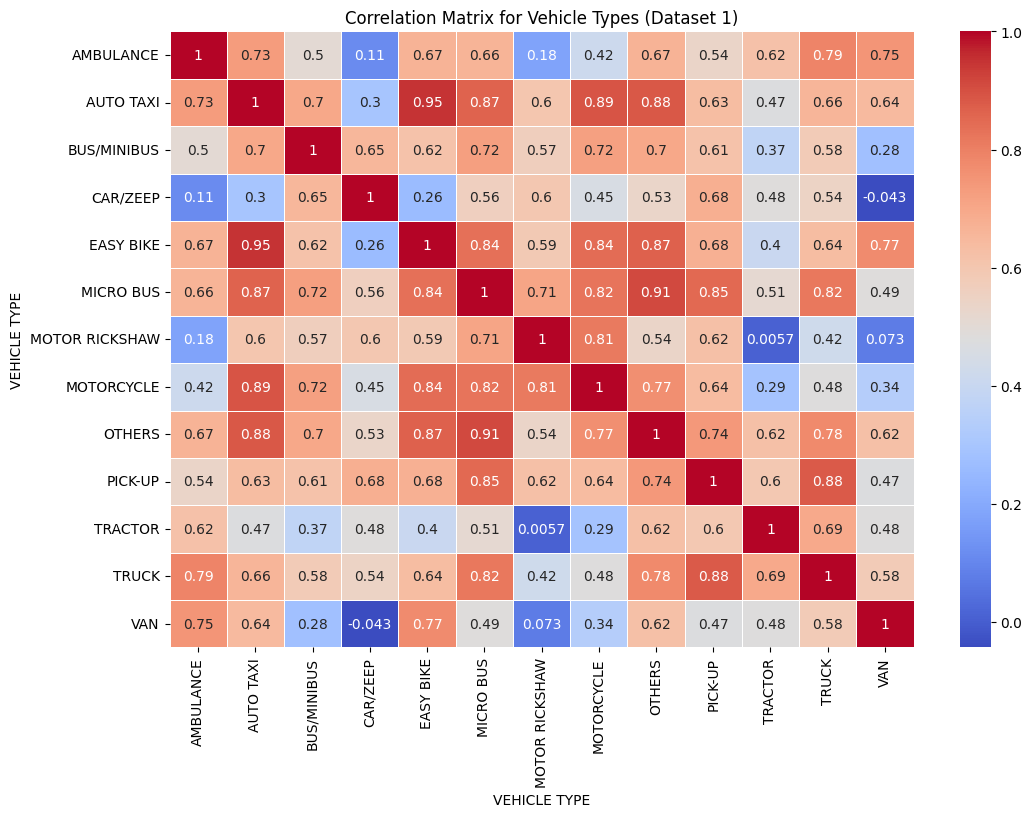

In [ ]:

# Reshape df1 to long format
df1_long = pd.melt(df1, id_vars=['VEHICLE TYPE'], var_name='Month', value_name='Accident_Count_1')

# Convert 'Month' column to a format that includes only month and year
df1_long['Month'] = pd.to_datetime(df1_long['Month'], format='%d-%b').dt.to_period('M')

# Pivot the dataframe to have vehicle types as columns and months as rows
df1_pivot = df1_long.pivot_table(index='Month', columns='VEHICLE TYPE', values='Accident_Count_1', aggfunc='sum')

# Calculate the correlation matrix for vehicle types
corr_matrix_vehicles_df1 = df1_pivot.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_vehicles_df1, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Vehicle Types (Dataset 1)')
plt.show()


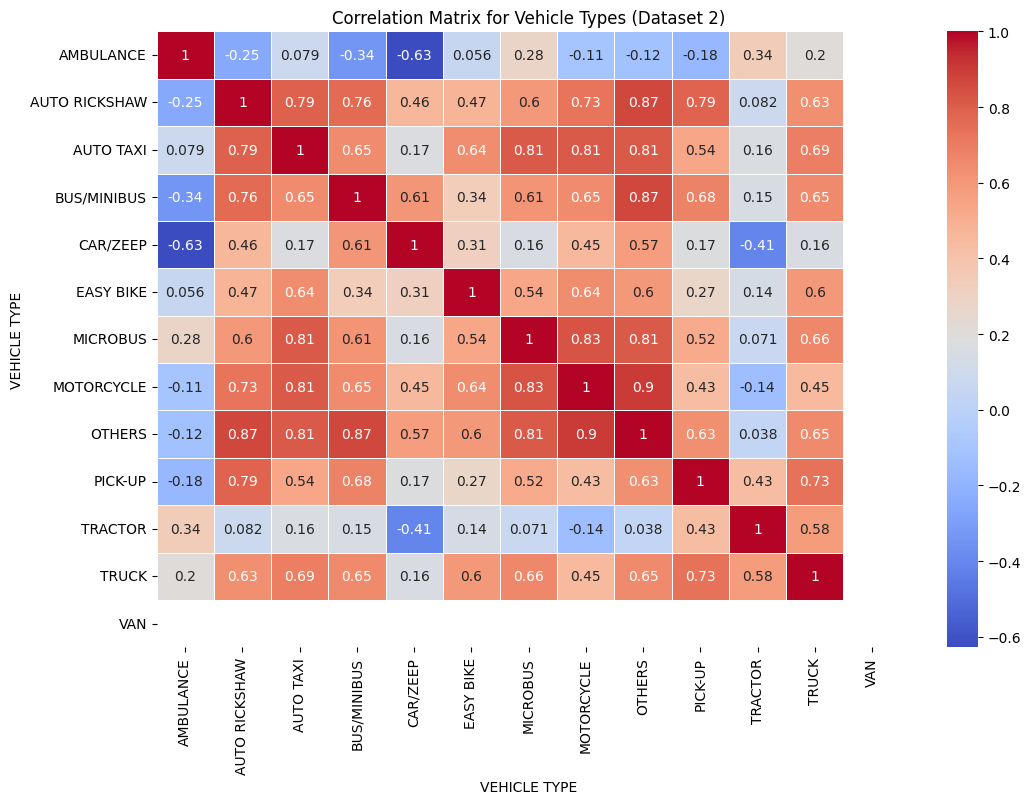

In [ ]:
# Reshape df2 to long format
df2_long = pd.melt(df2, id_vars=['VEHICLE TYPE'], var_name='Month', value_name='Accident_Count_2')

# Convert 'Month' column to a format that includes only month and year
df2_long['Month'] = pd.to_datetime(df2_long['Month'], format='%d-%b').dt.to_period('M')

# Pivot the dataframe to have vehicle types as columns and months as rows
df2_pivot = df2_long.pivot_table(index='Month', columns='VEHICLE TYPE', values='Accident_Count_2', aggfunc='sum')

# Calculate the correlation matrix for vehicle types
corr_matrix_vehicles_df2 = df2_pivot.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_vehicles_df2, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Vehicle Types (Dataset 2)')
plt.show()


##High-Risk Vehicles

In [ ]:
# Reshape df1 and df2 to long format
df1_long = pd.melt(df1, id_vars=['VEHICLE TYPE'], var_name='Month', value_name='Accident_Count_1')
df2_long = pd.melt(df2, id_vars=['VEHICLE TYPE'], var_name='Month', value_name='Killed_Count_2')

# Calculate the total and average accident counts for each vehicle type in df1
total_accidents_df1 = df1_long.groupby('VEHICLE TYPE')['Accident_Count_1'].sum().reset_index()
average_accidents_df1 = df1_long.groupby('VEHICLE TYPE')['Accident_Count_1'].mean().reset_index()

# Calculate the total and average accident counts for each vehicle type in df2
total_accidents_df2 = df2_long.groupby('VEHICLE TYPE')['Killed_Count_2'].sum().reset_index()
average_accidents_df2 = df2_long.groupby('VEHICLE TYPE')['Killed_Count_2'].mean().reset_index()

# Merge total and average counts into a single dataframe for each dataset
total_avg_df1 = pd.merge(total_accidents_df1, average_accidents_df1, on='VEHICLE TYPE', suffixes=('_Total', '_Avg'))
total_avg_df2 = pd.merge(total_accidents_df2, average_accidents_df2, on='VEHICLE TYPE', suffixes=('_Total', '_Avg'))

# Display the results
print("Total and Average Accident Counts for df1:")
print(total_avg_df1)

print("\nTotal and Average Killed Counts for df2:")
print(total_avg_df2)


Total and Average Accident Counts for df1:
      VEHICLE TYPE  Accident_Count_1_Total  Accident_Count_1_Avg
0        AMBULANCE                      13              0.928571
1        AUTO TAXI                     291             20.785714
2      BUS/MINIBUS                     310             22.142857
3         CAR/ZEEP                     100              7.142857
4        EASY BIKE                      14              1.000000
5        MICRO BUS                      72              5.142857
6   MOTOR RICKSHAW                      69              4.928571
7       MOTORCYCLE                     358             25.571429
8           OTHERS                     273             19.500000
9          PICK-UP                     123              8.785714
10         TRACTOR                      32              2.285714
11           TRUCK                     364             26.000000
12             VAN                       1              0.071429

Total and Average Killed Counts for df2:
     

#Analysis for dataset 3

## Normal Visualizations

In [ ]:
# Display the first few rows of the dataset
print("First few rows of df3:")
print(df3.head())

# Display the summary statistics of the dataset
print("\nSummary statistics of df3:")
print(df3.describe())

# Display the information of the dataset
print("\nInfo of df3:")
print(df3.info())

First few rows of df3:
  Description  TOTAL NUMBER OF ACCIDENT  TOTAL NUMBER OF PERSON KILLED  \
0      Apr-24                       135                            123   
1      Mar-24                       122                            104   
2      Feb-24                       126                            112   
3      Jan-24                        74                             45   
4      Dec-23                        94                             79   

   TOTAL NUMBER OF PERSON INJURED  
0                             227  
1                             150  
2                             223  
3                             133  
4                             172  

Summary statistics of df3:
       TOTAL NUMBER OF ACCIDENT  TOTAL NUMBER OF PERSON KILLED  \
count                 16.000000                      16.000000   
mean                  93.875000                      82.875000   
std                   21.121474                      22.943045   
min                   51

##Correlations: Injured vs Killed Persons

Correlation between injured and killed persons: 0.6310718652827122


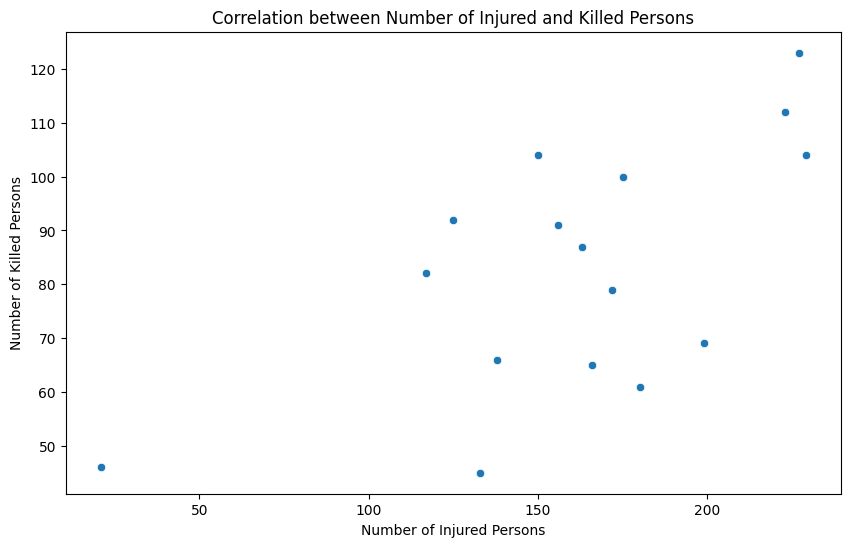

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correctly identify the columns
injured_column = 'TOTAL NUMBER OF PERSON INJURED'  # Replace with the actual column name
killed_column = 'TOTAL NUMBER OF PERSON KILLED'  # Replace with the actual column name

# Calculate the correlation
correlation = df3[injured_column].corr(df3[killed_column])
print(f"Correlation between injured and killed persons: {correlation}")

# Visualize the correlation with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df3[injured_column], y=df3[killed_column])
plt.title('Correlation between Number of Injured and Killed Persons')
plt.xlabel('Number of Injured Persons')
plt.ylabel('Number of Killed Persons')
plt.show()


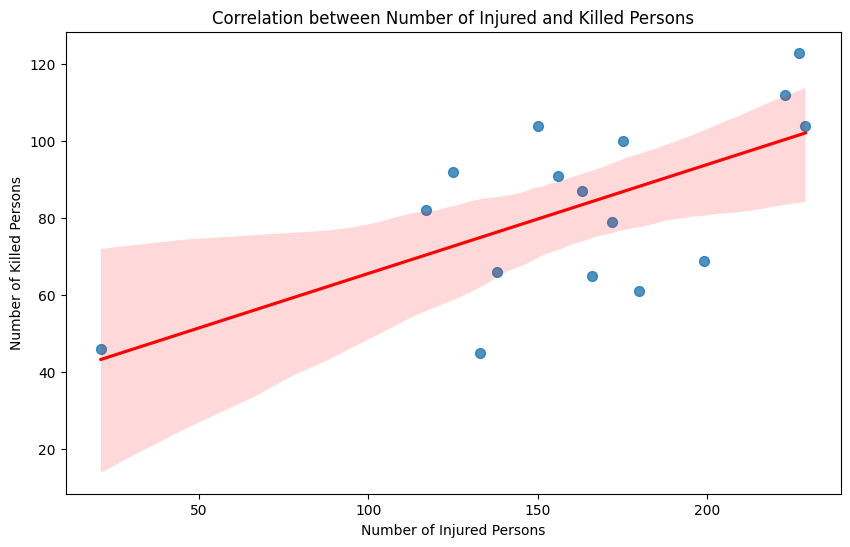

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correctly identify the columns
injured_column = 'TOTAL NUMBER OF PERSON INJURED'  # Replace with the actual column name
killed_column = 'TOTAL NUMBER OF PERSON KILLED'  # Replace with the actual column name

# Plot the correlation with a scatter plot and regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=df3[injured_column], y=df3[killed_column], scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Correlation between Number of Injured and Killed Persons')
plt.xlabel('Number of Injured Persons')
plt.ylabel('Number of Killed Persons')
plt.show()


##Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


First few rows of the dataset with cluster labels:
  Description  TOTAL NUMBER OF ACCIDENT  TOTAL NUMBER OF PERSON KILLED  \
0      Apr-24                       135                            123   
1      Mar-24                       122                            104   
2      Feb-24                       126                            112   
3      Jan-24                        74                             45   
4      Dec-23                        94                             79   

   TOTAL NUMBER OF PERSON INJURED  Cluster  
0                             227        0  
1                             150        0  
2                             223        0  
3                             133        2  
4                             172        2  
Cluster Centroids:
   TOTAL NUMBER OF ACCIDENT  TOTAL NUMBER OF PERSON INJURED  \
0                     114.6                           200.8   
1                      51.0                            21.0   
2                      87.

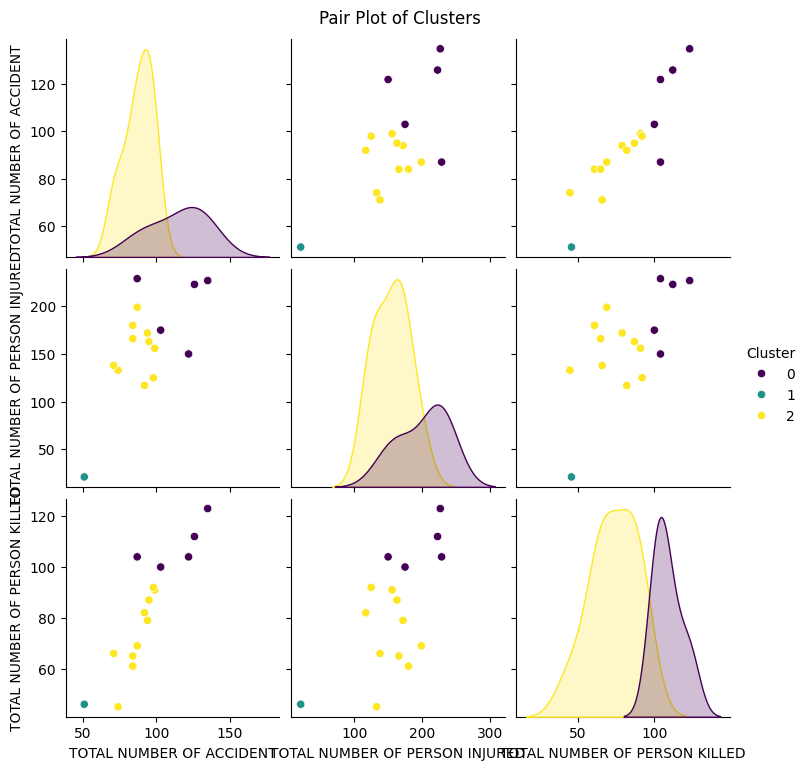

Cluster Summary Statistics:
  Cluster TOTAL NUMBER OF ACCIDENT                    \
                              mean median        std   
0       0                    114.6  122.0  19.346834   
1       1                     51.0   51.0        NaN   
2       2                     87.8   89.5   9.658617   

  TOTAL NUMBER OF PERSON INJURED                    \
                            mean median        std   
0                          200.8  223.0  36.127552   
1                           21.0   21.0        NaN   
2                          154.9  159.5  26.146808   

  TOTAL NUMBER OF PERSON KILLED                    
                           mean median        std  
0                         108.6  104.0   9.154234  
1                          46.0   46.0        NaN  
2                          73.7   74.0  15.092677  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Select relevant columns for clustering
relevant_columns = ['TOTAL NUMBER OF ACCIDENT', 'TOTAL NUMBER OF PERSON INJURED', 'TOTAL NUMBER OF PERSON KILLED']

# Handle missing values
df3 = df3.dropna(subset=relevant_columns)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df3[relevant_columns])

# Convert scaled data back to a DataFrame
df3_scaled = pd.DataFrame(scaled_data, columns=relevant_columns)

# Define the number of clusters
num_clusters = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df3['Cluster'] = kmeans.fit_predict(df3_scaled)

# Display the first few rows of the dataset with cluster labels
print("First few rows of the dataset with cluster labels:")
print(df3.head())

# Calculate and display cluster centroids
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=relevant_columns)
centroids['Cluster'] = centroids.index
print("Cluster Centroids:")
print(centroids)

# Calculate silhouette score
silhouette_avg = silhouette_score(df3_scaled, df3['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Pair plot to visualize clusters
sns.pairplot(df3, hue='Cluster', vars=relevant_columns, palette='viridis')
plt.suptitle('Pair Plot of Clusters', y=1.02)
plt.show()

# Calculate summary statistics for each cluster
cluster_summary = df3.groupby('Cluster').agg({
    'TOTAL NUMBER OF ACCIDENT': ['mean', 'median', 'std'],
    'TOTAL NUMBER OF PERSON INJURED': ['mean', 'median', 'std'],
    'TOTAL NUMBER OF PERSON KILLED': ['mean', 'median', 'std']
}).reset_index()

print("Cluster Summary Statistics:")
print(cluster_summary)


A silhouette score of 0.35 suggests that there is some separation between the clusters, but it is not very strong. There might be some overlap between clusters.

##Future accident prediction for risky vehicles

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


CAR/ZEEP RMSE: 7.088723439378913


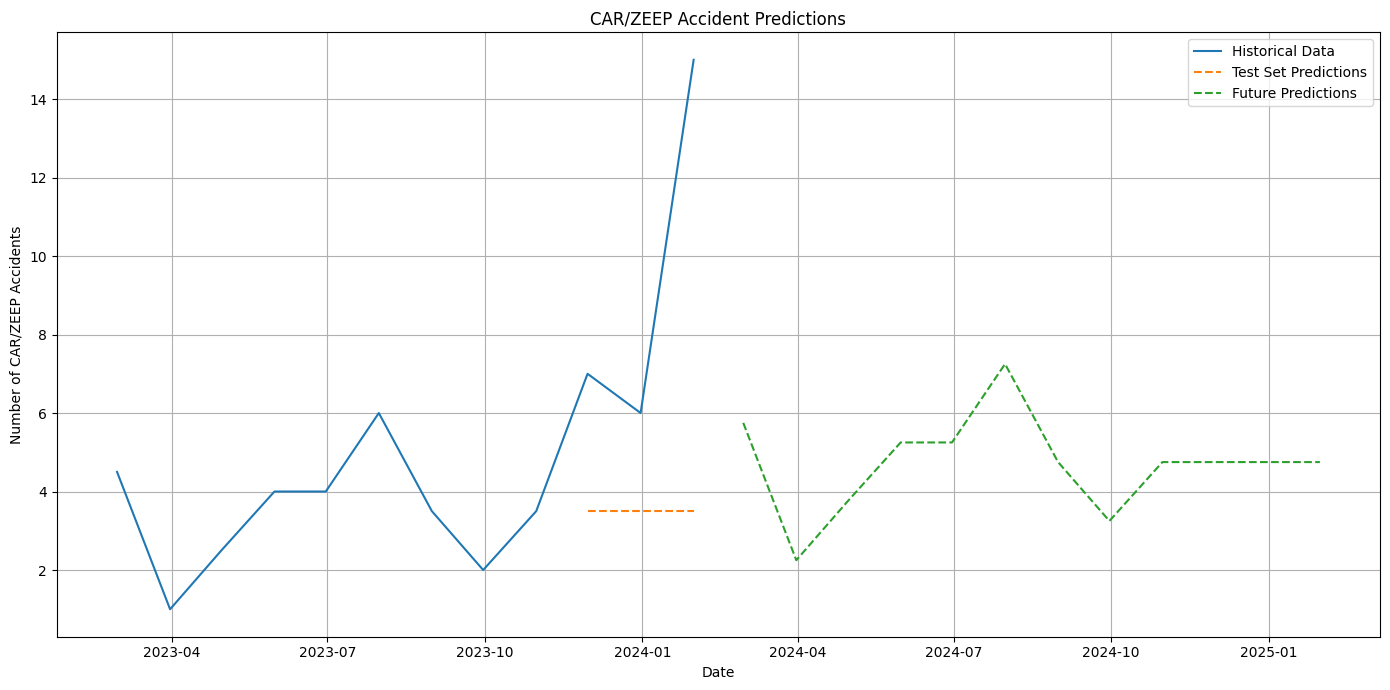

Future Predictions for CAR/ZEEP (next 12 months):
2024-02-29    5.750001
2024-03-31    2.250001
2024-04-30    3.750001
2024-05-31    5.250001
2024-06-30    5.250001
2024-07-31    7.250001
2024-08-31    4.750001
2024-09-30    3.250001
2024-10-31    4.750001
2024-11-30    4.750001
2024-12-31    4.750001
2025-01-31    4.750001
Freq: M, Name: predicted_mean, dtype: float64
BUS/MINIBUS RMSE: 7.082843120291926


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


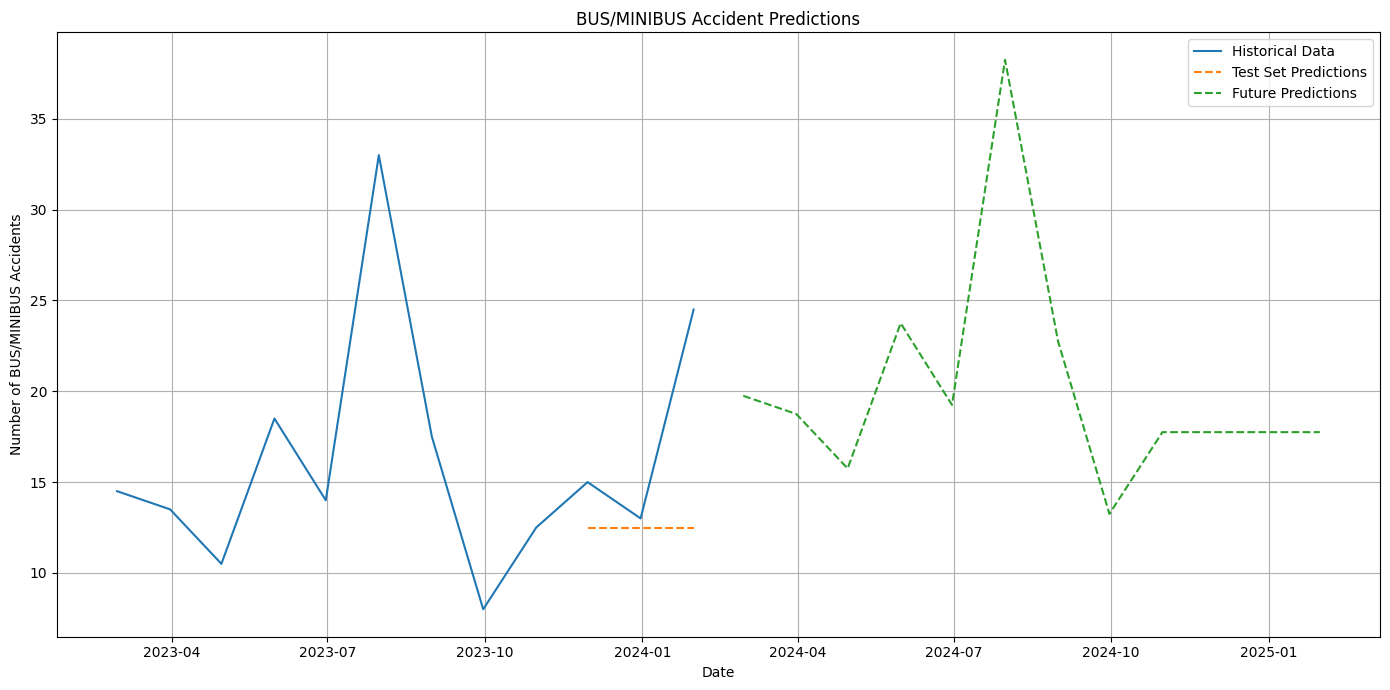

Future Predictions for BUS/MINIBUS (next 12 months):
2024-02-29    19.750004
2024-03-31    18.750004
2024-04-30    15.750004
2024-05-31    23.750004
2024-06-30    19.250004
2024-07-31    38.250004
2024-08-31    22.750004
2024-09-30    13.250004
2024-10-31    17.750004
2024-11-30    17.750004
2024-12-31    17.750004
2025-01-31    17.750004
Freq: M, Name: predicted_mean, dtype: float64
TRUCK RMSE: 4.320493798938574


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


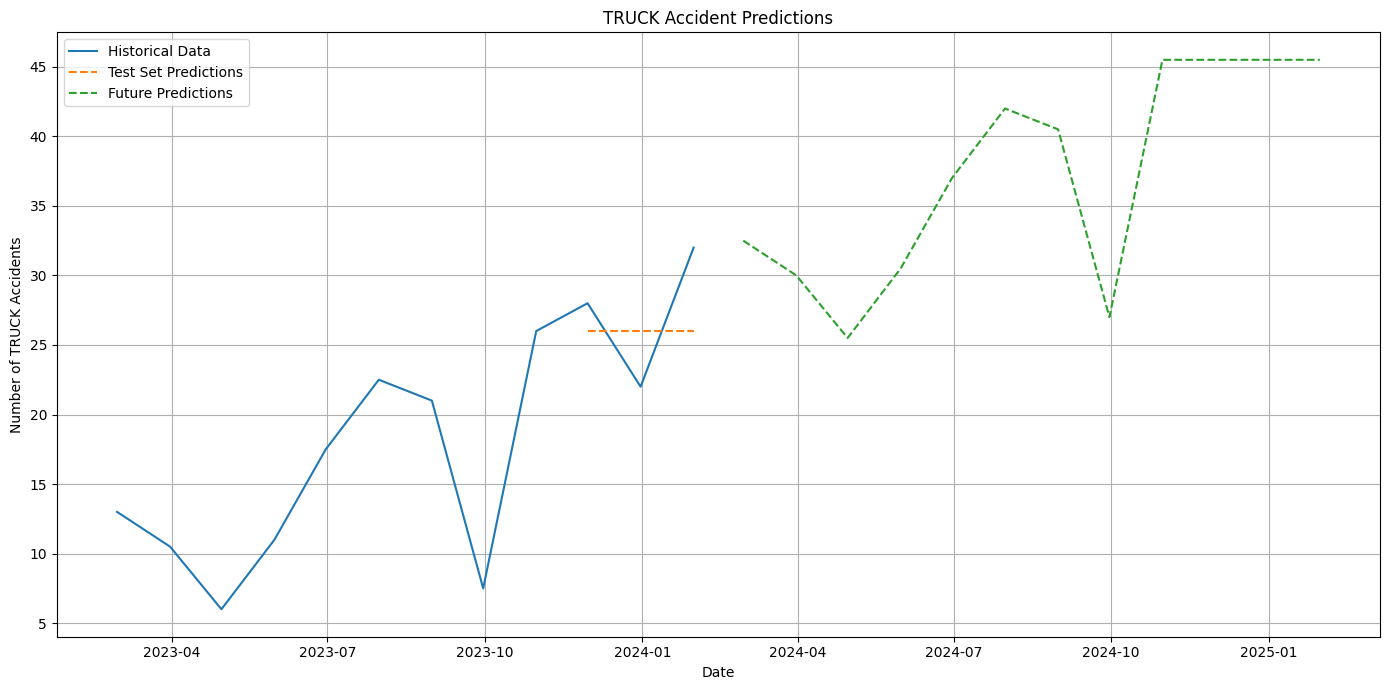

Future Predictions for TRUCK (next 12 months):
2024-02-29    32.500003
2024-03-31    30.000003
2024-04-30    25.500003
2024-05-31    30.500003
2024-06-30    37.000003
2024-07-31    42.000003
2024-08-31    40.500003
2024-09-30    27.000003
2024-10-31    45.500003
2024-11-30    45.500003
2024-12-31    45.500003
2025-01-31    45.500003
Freq: M, Name: predicted_mean, dtype: float64
PICK-UP RMSE: 3.278719262151


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


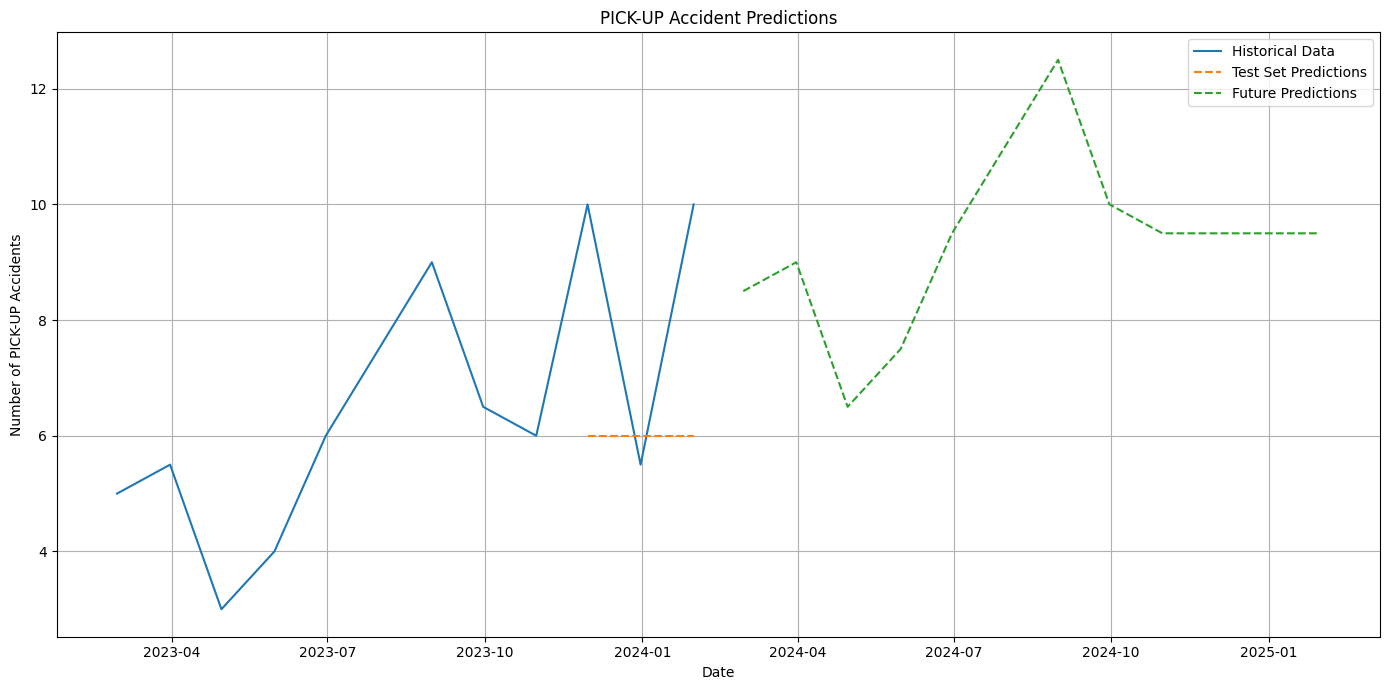

Future Predictions for PICK-UP (next 12 months):
2024-02-29     8.500001
2024-03-31     9.000001
2024-04-30     6.500001
2024-05-31     7.500001
2024-06-30     9.500001
2024-07-31    11.000001
2024-08-31    12.500001
2024-09-30    10.000001
2024-10-31     9.500001
2024-11-30     9.500001
2024-12-31     9.500001
2025-01-31     9.500001
Freq: M, Name: predicted_mean, dtype: float64
No data available for MICRO BUS
MOTORCYCLE RMSE: 8.067424206853966


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


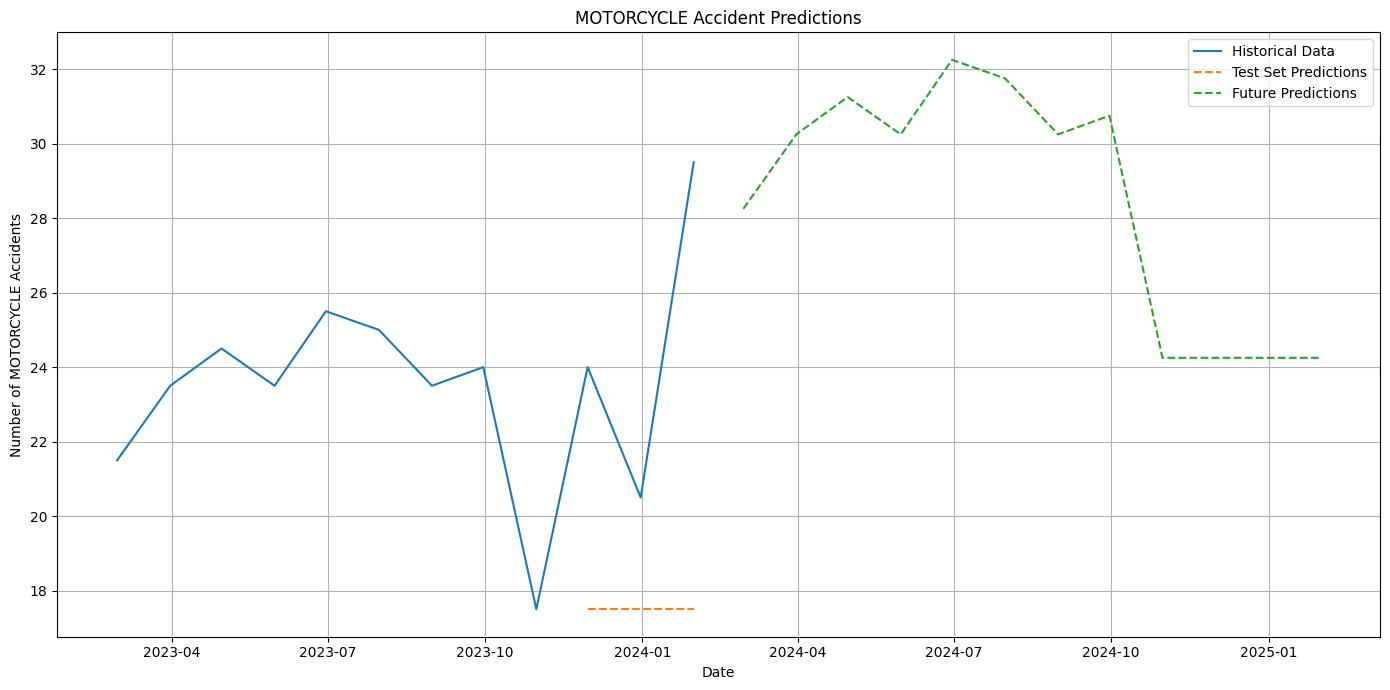

Future Predictions for MOTORCYCLE (next 12 months):
2024-02-29    28.250005
2024-03-31    30.250005
2024-04-30    31.250005
2024-05-31    30.250005
2024-06-30    32.250005
2024-07-31    31.750005
2024-08-31    30.250005
2024-09-30    30.750005
2024-10-31    24.250005
2024-11-30    24.250005
2024-12-31    24.250005
2025-01-31    24.250005
Freq: M, Name: predicted_mean, dtype: float64
AUTO TAXI RMSE: 4.839077046985992


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


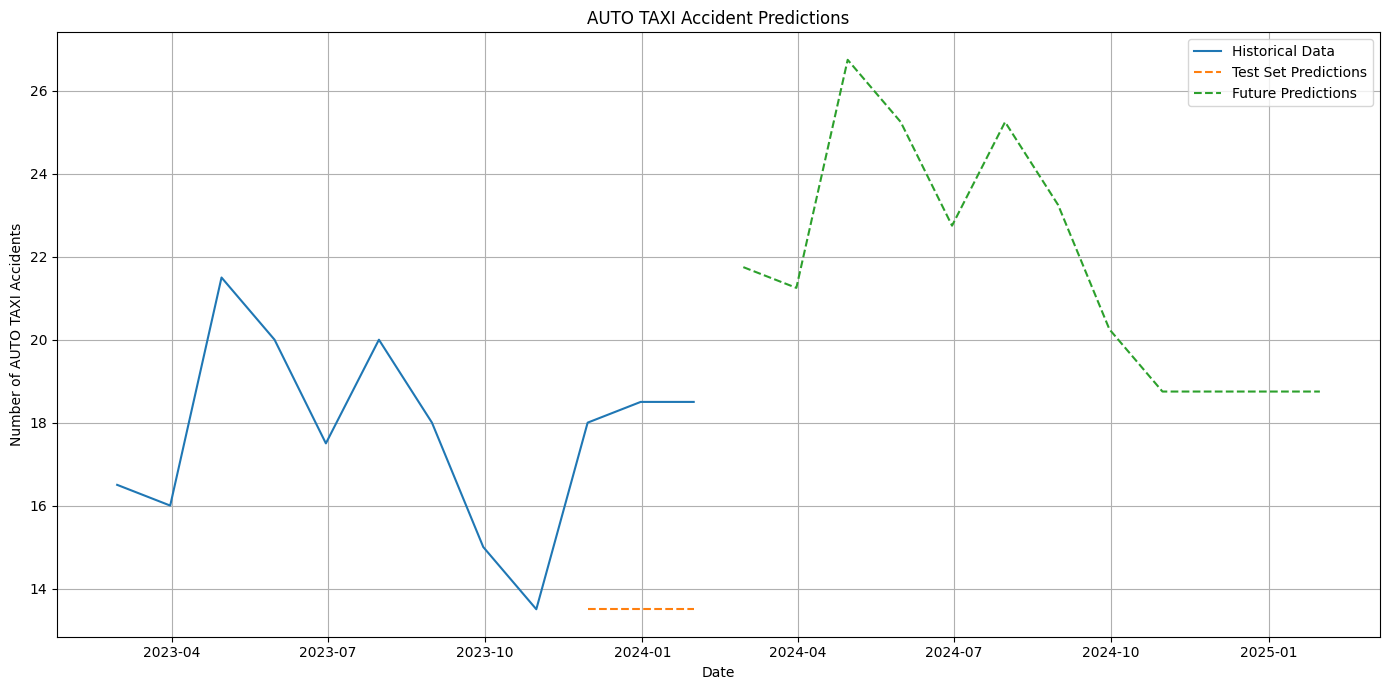

Future Predictions for AUTO TAXI (next 12 months):
2024-02-29    21.750004
2024-03-31    21.250004
2024-04-30    26.750004
2024-05-31    25.250004
2024-06-30    22.750004
2024-07-31    25.250004
2024-08-31    23.250004
2024-09-30    20.250004
2024-10-31    18.750004
2024-11-30    18.750004
2024-12-31    18.750004
2025-01-31    18.750004
Freq: M, Name: predicted_mean, dtype: float64
No data available for AUTO RICKSHAW


{'CAR/ZEEP': 2024-02-29    5.750001
 2024-03-31    2.250001
 2024-04-30    3.750001
 2024-05-31    5.250001
 2024-06-30    5.250001
 2024-07-31    7.250001
 2024-08-31    4.750001
 2024-09-30    3.250001
 2024-10-31    4.750001
 2024-11-30    4.750001
 2024-12-31    4.750001
 2025-01-31    4.750001
 Freq: M, Name: predicted_mean, dtype: float64,
 'BUS/MINIBUS': 2024-02-29    19.750004
 2024-03-31    18.750004
 2024-04-30    15.750004
 2024-05-31    23.750004
 2024-06-30    19.250004
 2024-07-31    38.250004
 2024-08-31    22.750004
 2024-09-30    13.250004
 2024-10-31    17.750004
 2024-11-30    17.750004
 2024-12-31    17.750004
 2025-01-31    17.750004
 Freq: M, Name: predicted_mean, dtype: float64,
 'TRUCK': 2024-02-29    32.500003
 2024-03-31    30.000003
 2024-04-30    25.500003
 2024-05-31    30.500003
 2024-06-30    37.000003
 2024-07-31    42.000003
 2024-08-31    40.500003
 2024-09-30    27.000003
 2024-10-31    45.500003
 2024-11-30    45.500003
 2024-12-31    45.500003
 2025

In [ ]:
# Install necessary libraries
!pip install statsmodels matplotlib pandas scikit-learn

# Import required libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define the vehicle types we want to analyze
vehicle_types = ['CAR/ZEEP', 'BUS/MINIBUS', 'TRUCK', 'PICK-UP', 'MICRO BUS', 'MOTORCYCLE', 'AUTO TAXI', 'AUTO RICKSHAW']

# Function to predict and plot accidents for each vehicle type
def predict_accidents(vehicle_type, df1, df2):
    # Check for vehicle-related data in the datasets
    vehicle_accident1 = df1[df1['VEHICLE TYPE'].str.contains(vehicle_type, case=False, na=False)]
    vehicle_accident2 = df2[df2['VEHICLE TYPE'].str.contains(vehicle_type, case=False, na=False)]

    # If no data is found for the vehicle type, skip the prediction
    if vehicle_accident1.empty or vehicle_accident2.empty:
        print(f'No data available for {vehicle_type}')
        return None

    # Extract the monthly data for vehicle accidents
    months = ['24-Apr', '24-Mar', '24-Feb', '24-Jan', '23-Dec', '23-Nov', '23-Oct', '23-Sep', '23-Aug', '23-Jul', '23-May', '23-Apr', '23-Mar', '23-Feb']
    vehicle_data1 = vehicle_accident1.iloc[0, 1:].values
    vehicle_data2 = vehicle_accident2.iloc[0, 1:].values

    # Reverse the months and data to have chronological order
    months_reversed = months[::-1]
    vehicle_data1_reversed = vehicle_data1[::-1]
    vehicle_data2_reversed = vehicle_data2[::-1]

    # Find the common length for alignment
    common_length = min(len(vehicle_data1_reversed), len(vehicle_data2_reversed))

    # Align the data arrays to the common length
    vehicle_data1_aligned = vehicle_data1_reversed[:common_length]
    vehicle_data2_aligned = vehicle_data2_reversed[:common_length]
    months_aligned = months_reversed[:common_length]

    # Combine the two datasets to create a single time series for vehicle accidents
    combined_vehicle_data = (vehicle_data1_aligned + vehicle_data2_aligned) / 2

    # Prepare the data for time series analysis
    date_range = pd.date_range(start='2023-02-01', periods=len(combined_vehicle_data), freq='M')
    vehicle_accidents_series = pd.Series(combined_vehicle_data, index=date_range)

    # Ensure the data is in numeric format
    vehicle_accidents_series = vehicle_accidents_series.astype(float)

    # Split the data into training and test sets
    train_size = int(len(vehicle_accidents_series) * 0.8)
    train, test = vehicle_accidents_series[:train_size], vehicle_accidents_series[train_size:]

    # Fit an ARIMA model
    model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit(disp=False)

    # Make predictions for the test set
    predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

    # Calculate error
    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(mse)
    print(f'{vehicle_type} RMSE: {rmse}')

    # Forecast future vehicle accidents for 12 months
    future_predictions = model_fit.predict(start=len(vehicle_accidents_series), end=len(vehicle_accidents_series) + 11)

    # Plot the historical data, test set predictions, and future predictions
    plt.figure(figsize=(14, 7))
    plt.plot(vehicle_accidents_series, label='Historical Data')
    plt.plot(test.index, predictions, label='Test Set Predictions', linestyle='--')
    plt.plot(future_predictions.index, future_predictions, label='Future Predictions', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel(f'Number of {vehicle_type} Accidents')
    plt.title(f'{vehicle_type} Accident Predictions')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Print the future predictions
    print(f"Future Predictions for {vehicle_type} (next 12 months):")
    print(future_predictions)
    return future_predictions

# Predict accidents for each vehicle type
predictions_all_vehicles = {}
for vehicle_type in vehicle_types:
    predictions_all_vehicles[vehicle_type] = predict_accidents(vehicle_type, df1, df2)

# Display all predictions
predictions_all_vehicles
